# Step 2.1: Exploratory Feature Analysis
## LinkedIn Engagement Prediction - TrendPilot

**Date:** February 1, 2026  
**Objective:** Analyze selected features and their relationships with engagement targets

---

## Overview

Comprehensive analysis of 90 selected features:
1. **Distribution Analysis:** Histograms, box plots for each feature
2. **Correlation Analysis:** Feature-target and feature-feature correlations
3. **Relationship Visualization:** Scatter plots for top features
4. **Statistical Summary:** Descriptive statistics

**Goal:** Understand feature characteristics before modeling

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries imported")

✓ Libraries imported


In [2]:
# Load selected features data
INPUT_FILE = '../data/selected_features_data.csv'
df = pd.read_csv(INPUT_FILE)

print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")

# Identify feature and target columns
metadata_cols = ['name', 'slno', 'content', 'time_spent', 'location', 'followers']
target_cols = ['reactions', 'comments']
feature_cols = [col for col in df.columns if col not in metadata_cols + target_cols]

print(f"Features: {len(feature_cols)}")
print(f"Targets: {target_cols}")

df.head(3)

Dataset: 139 rows × 87 columns
Features: 80
Targets: ['reactions', 'comments']


,name,content,reactions,comments,time_spent,location,followers,comments_per_word,reactions_per_sentiment,influencer_std_reactions,...,style_bullet_count,style_has_bullets,has_external_link,style_has_quotes,has_specific_time_content,has_underdog,has_hidden_truth,ner_event_count,has_announcement_hook,is_link_spam
0,ankit-pangasa,Learn Sharding vs Consistent Hashing in 5 Minu...,68.0,6.0,0,NaN,40175,0.018182,68.965517,76.1203,...,5,1,0,0,0,0,0,0,0,0
1,ankit-pangasa,"If charts are the only thing you’re watching, ...",156.0,23.0,1,NaN,40175,0.176923,180.180180,76.1203,...,0,0,1,0,0,0,0,0,0,0
2,ankit-pangasa,🚀 Git Doesn’t Have to Be Complicated Sometimes...,166.0,23.0,1,NaN,40175,0.152318,178.533018,76.1203,...,0,0,0,0,0,1,0,0,0,0


In [3]:
print(df.columns)

Index(['name', 'content', 'reactions', 'comments', 'time_spent', 'location',
       'followers', 'comments_per_word', 'reactions_per_sentiment',
       'influencer_std_reactions', 'comments_vs_influencer_avg',
       'has_aspirational', 'ner_location_count', 'reactions_vs_influencer_avg',
       'comment_to_reaction_ratio', 'readability_flesch_kincaid',
       'has_location_mention', 'text_difficult_words_count',
       'sentiment_compound', 'ner_total_entities', 'text_lexical_diversity',
       'text_avg_sentence_length', 'power_pattern_score', 'ner_product_count',
       'style_quote_marks', 'style_question_marks', 'style_number_count',
       'topic_count', 'style_has_question', 'base_score_capped',
       'influencer_std_comments', 'ner_date_count', 'sentiment_x_readability',
       'length_score', 'has_personal_story', 'style_all_caps_words',
       'has_contrast', 'has_adversity_learning', 'topic_leadership',
       'has_vulnerability', 'topic_career', 'has_family', 'ner_org_coun

## 1. Target Variable Analysis

TARGET VARIABLE STATISTICS

REACTIONS:
  Mean: 462.35
  Median: 47.00
  Std: 1371.71
  Min: 1
  Max: 6820
  Skewness: 3.80
  25th percentile: 19.50
  75th percentile: 145.50

COMMENTS:
  Mean: 38.56
  Median: 3.00
  Std: 107.32
  Min: 0
  Max: 562
  Skewness: 3.73
  25th percentile: 1.00
  75th percentile: 18.50


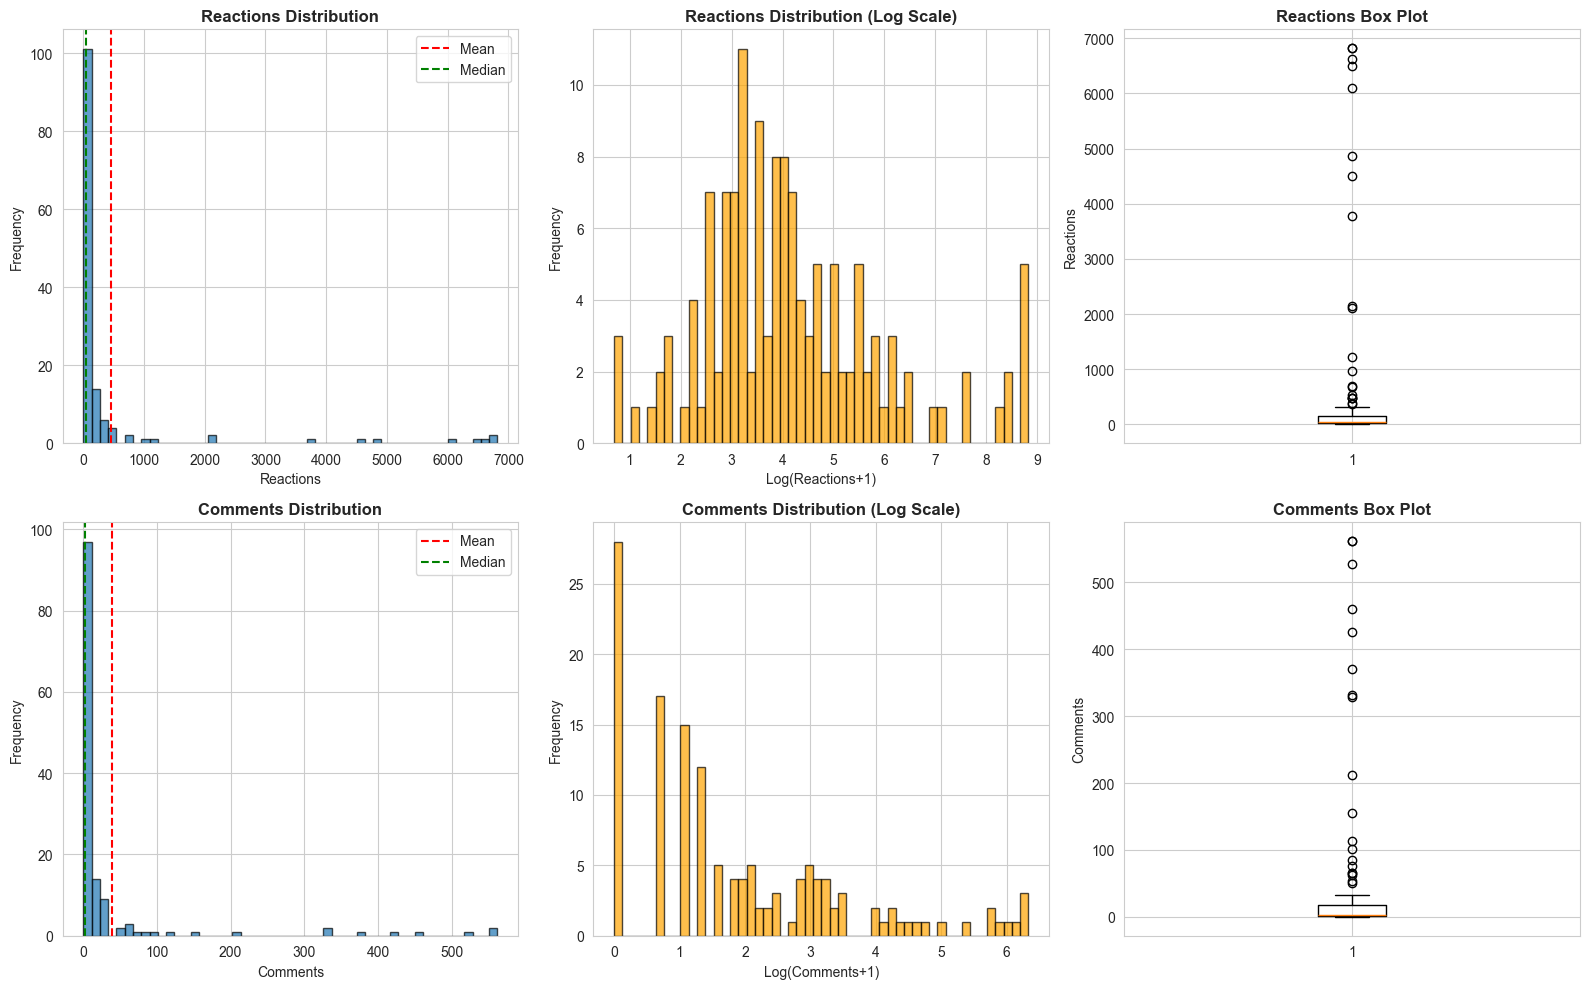


✓ Target analysis complete


In [4]:
print("TARGET VARIABLE STATISTICS")
print("="*60)

for target in target_cols:
    print(f"\n{target.upper()}:")
    print(f"  Mean: {df[target].mean():.2f}")
    print(f"  Median: {df[target].median():.2f}")
    print(f"  Std: {df[target].std():.2f}")
    print(f"  Min: {df[target].min():.0f}")
    print(f"  Max: {df[target].max():.0f}")
    print(f"  Skewness: {df[target].skew():.2f}")
    print(f"  25th percentile: {df[target].quantile(0.25):.2f}")
    print(f"  75th percentile: {df[target].quantile(0.75):.2f}")

# Visualize target distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, target in enumerate(target_cols):
    # Histogram
    axes[i, 0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
    axes[i, 0].set_xlabel(target.capitalize())
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title(f'{target.capitalize()} Distribution', fontweight='bold')
    axes[i, 0].axvline(df[target].mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(df[target].median(), color='green', linestyle='--', label='Median')
    axes[i, 0].legend()
    
    # Log-scale histogram
    axes[i, 1].hist(np.log1p(df[target]), bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[i, 1].set_xlabel(f'Log({target.capitalize()}+1)')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].set_title(f'{target.capitalize()} Distribution (Log Scale)', fontweight='bold')
    
    # Box plot
    axes[i, 2].boxplot(df[target], vert=True)
    axes[i, 2].set_ylabel(target.capitalize())
    axes[i, 2].set_title(f'{target.capitalize()} Box Plot', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Target analysis complete")

## 2. Feature-Target Correlation

Calculating feature-target correlations...

Top 15 features correlated with REACTIONS:
                   feature  reactions_corr  abs_reactions
   reactions_per_sentiment        0.979367       0.979367
         comments_per_word        0.900690       0.900690
  influencer_std_reactions        0.764224       0.764224
   influencer_std_comments        0.532060       0.532060
           has_org_mention       -0.449996       0.449996
                topic_tech       -0.405545       0.405545
readability_flesch_kincaid       -0.384756       0.384756
         style_has_numbers       -0.350141       0.350141
              topic_career        0.326417       0.326417
        has_personal_story        0.297319       0.297319
  text_avg_sentence_length       -0.261231       0.261231
              has_entities       -0.261090       0.261090
 influencer_avg_base_score        0.260036       0.260036
      has_location_mention       -0.257251       0.257251
        style_has_all_caps       -0.244240 

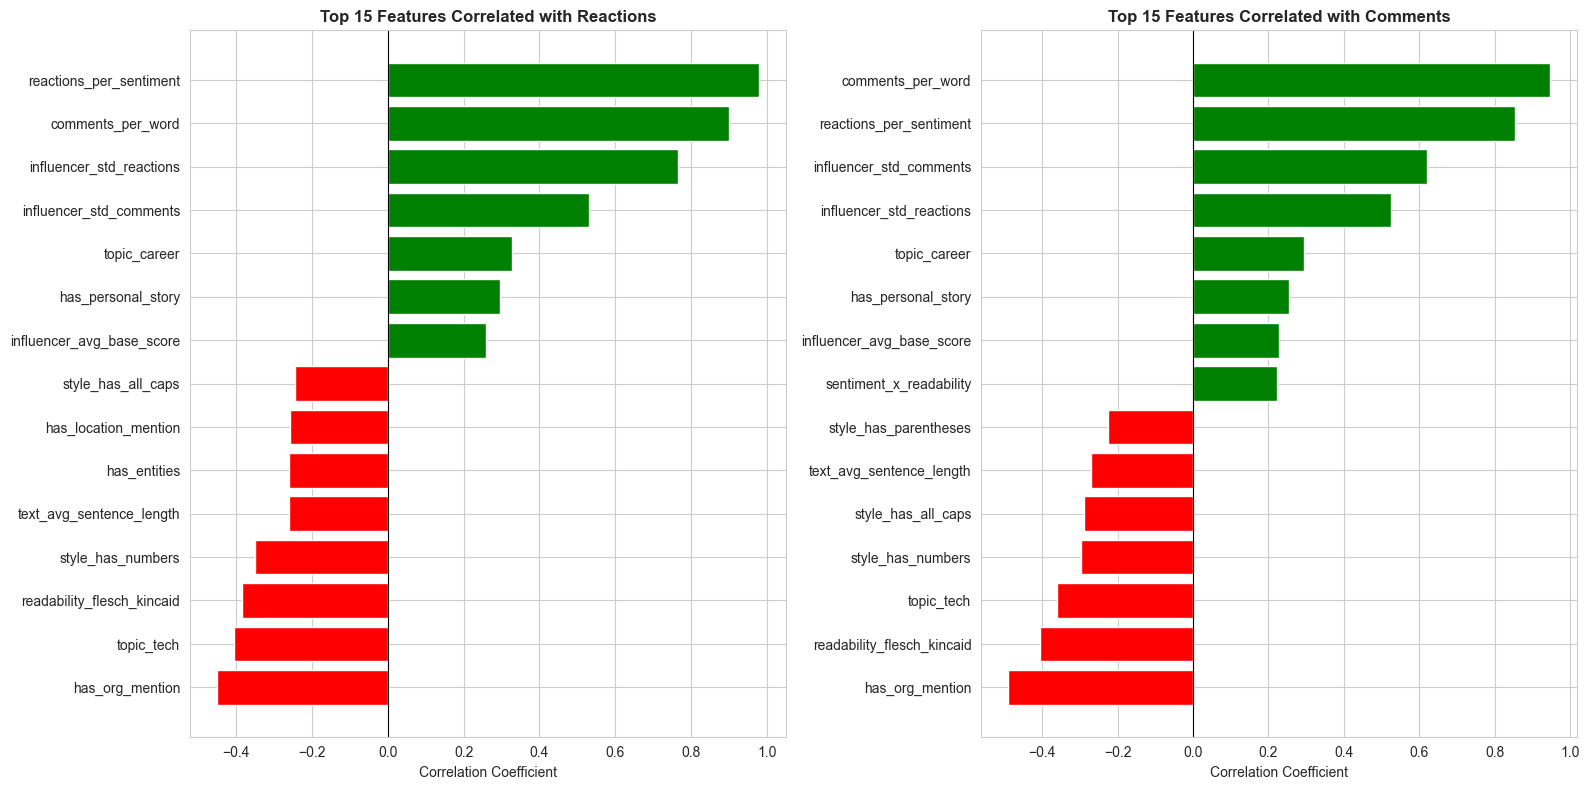


✓ Feature-target correlation analysis complete


In [5]:
print("Calculating feature-target correlations...")

# Calculate correlations
numeric_features = [col for col in feature_cols if df[col].dtype in [np.float64, np.int64]]
correlations = pd.DataFrame({
    'feature': numeric_features,
    'reactions_corr': [df[feat].corr(df['reactions']) for feat in numeric_features],
    'comments_corr': [df[feat].corr(df['comments']) for feat in numeric_features]
})

correlations['abs_reactions'] = correlations['reactions_corr'].abs()
correlations['abs_comments'] = correlations['comments_corr'].abs()
correlations['avg_abs_corr'] = (correlations['abs_reactions'] + correlations['abs_comments']) / 2

# Top correlations for reactions
print("\nTop 15 features correlated with REACTIONS:")
top_reactions = correlations.nlargest(15, 'abs_reactions')[['feature', 'reactions_corr', 'abs_reactions']]
print(top_reactions.to_string(index=False))

# Top correlations for comments
print("\nTop 15 features correlated with COMMENTS:")
top_comments = correlations.nlargest(15, 'abs_comments')[['feature', 'comments_corr', 'abs_comments']]
print(top_comments.to_string(index=False))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Reactions
top15_reactions = correlations.nlargest(15, 'abs_reactions').sort_values('reactions_corr')
colors_r = ['green' if x > 0 else 'red' for x in top15_reactions['reactions_corr']]
axes[0].barh(range(15), top15_reactions['reactions_corr'], color=colors_r)
axes[0].set_yticks(range(15))
axes[0].set_yticklabels(top15_reactions['feature'])
axes[0].set_xlabel('Correlation Coefficient')
axes[0].set_title('Top 15 Features Correlated with Reactions', fontweight='bold')
axes[0].axvline(0, color='black', linestyle='-', linewidth=0.8)

# Comments
top15_comments = correlations.nlargest(15, 'abs_comments').sort_values('comments_corr')
colors_c = ['green' if x > 0 else 'red' for x in top15_comments['comments_corr']]
axes[1].barh(range(15), top15_comments['comments_corr'], color=colors_c)
axes[1].set_yticks(range(15))
axes[1].set_yticklabels(top15_comments['feature'])
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Top 15 Features Correlated with Comments', fontweight='bold')
axes[1].axvline(0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n✓ Feature-target correlation analysis complete")

## 3. Feature Distributions

Analyzing feature distributions...


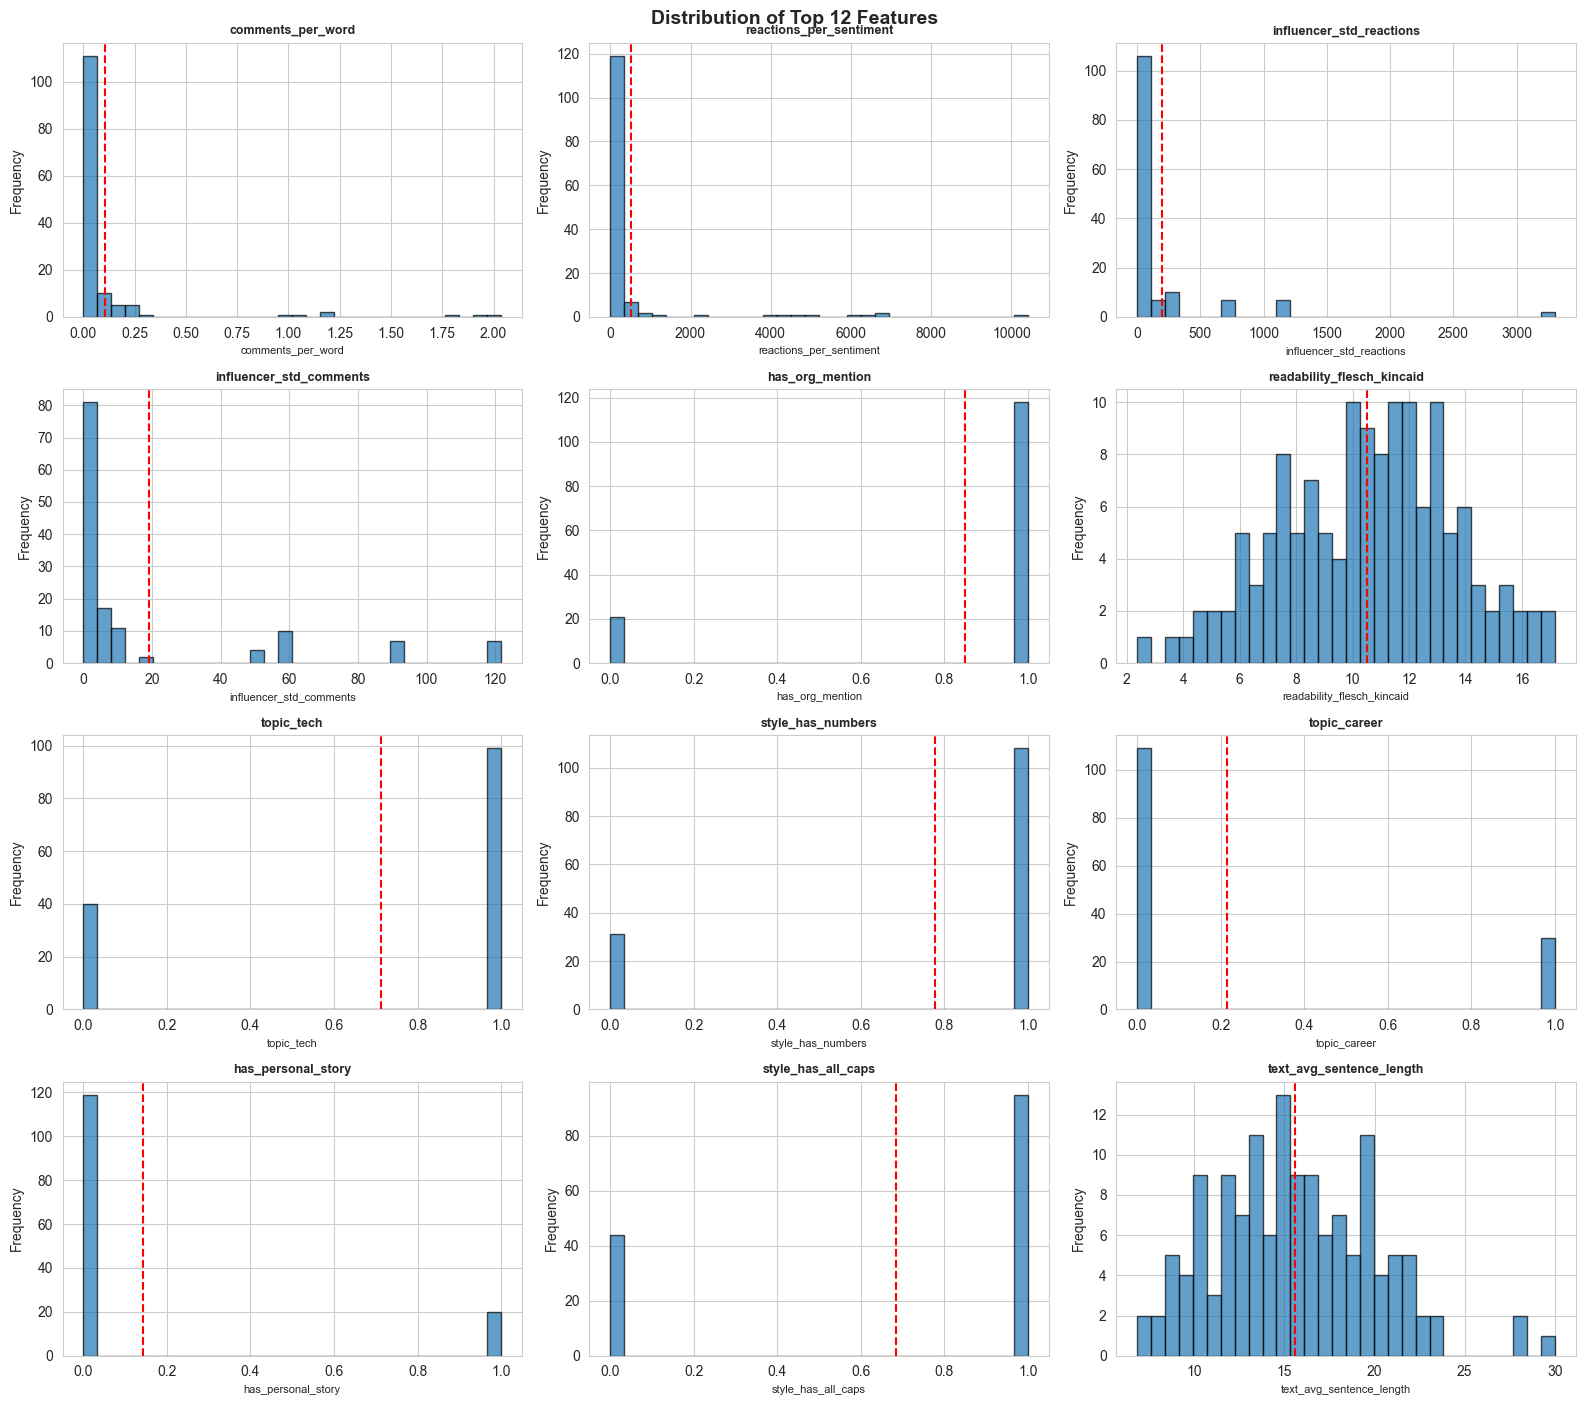


✓ Feature distribution analysis complete


In [6]:
print("Analyzing feature distributions...")

# Top 12 most important features for detailed analysis
top_features = correlations.nlargest(12, 'avg_abs_corr')['feature'].tolist()

fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    axes[i].hist(df[feat].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(feat, fontsize=8)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{feat}', fontweight='bold', fontsize=9)
    axes[i].axvline(df[feat].mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')

plt.tight_layout()
plt.suptitle('Distribution of Top 12 Features', fontsize=14, fontweight='bold', y=1.00)
plt.show()

print("\n✓ Feature distribution analysis complete")

## 4. Scatter Plots: Features vs Targets

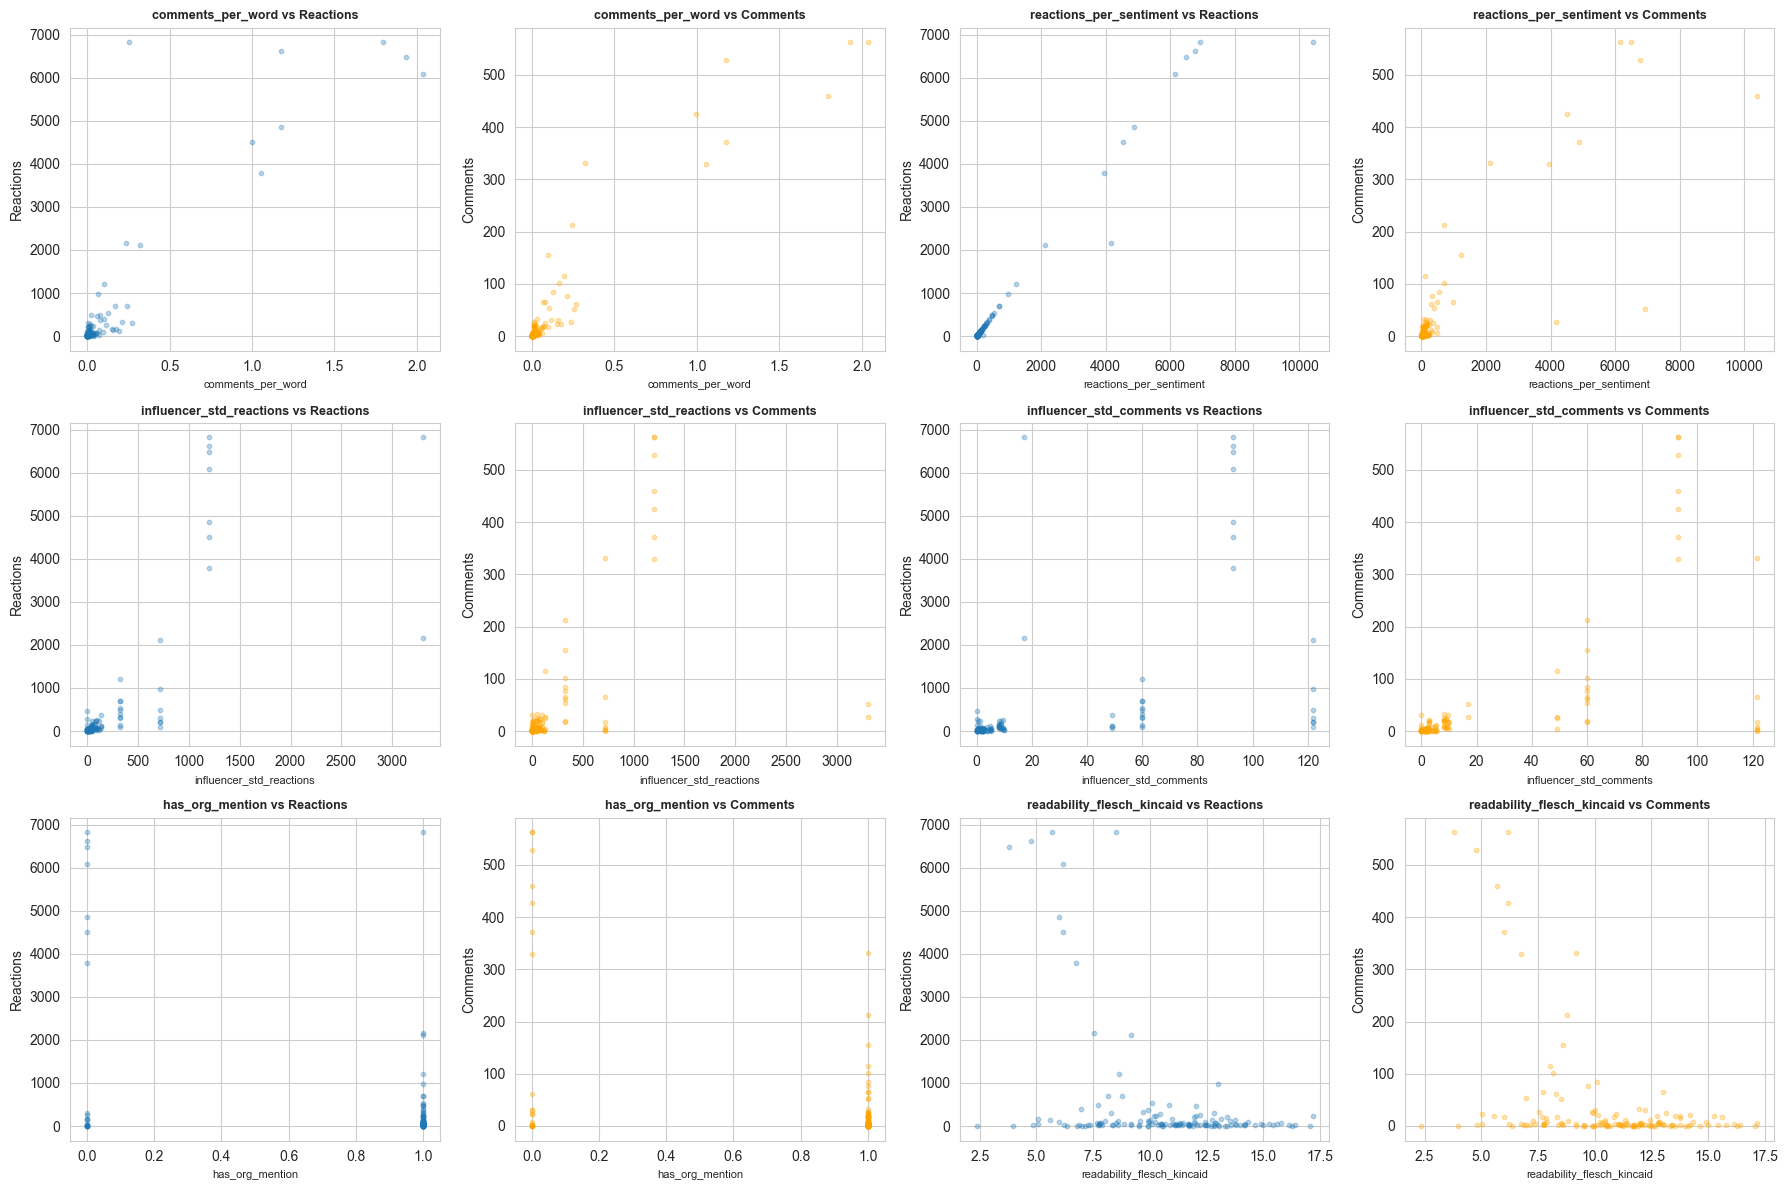

✓ Scatter plot analysis complete


In [7]:
# Scatter plots for top 6 features
top6_features = correlations.nlargest(6, 'avg_abs_corr')['feature'].tolist()

fig, axes = plt.subplots(3, 4, figsize=(18, 12))

for i, feat in enumerate(top6_features):
    # vs reactions
    axes[i//2, (i%2)*2].scatter(df[feat], df['reactions'], alpha=0.3, s=10)
    axes[i//2, (i%2)*2].set_xlabel(feat, fontsize=8)
    axes[i//2, (i%2)*2].set_ylabel('Reactions')
    axes[i//2, (i%2)*2].set_title(f'{feat} vs Reactions', fontweight='bold', fontsize=9)
    
    # vs comments
    axes[i//2, (i%2)*2+1].scatter(df[feat], df['comments'], alpha=0.3, s=10, color='orange')
    axes[i//2, (i%2)*2+1].set_xlabel(feat, fontsize=8)
    axes[i//2, (i%2)*2+1].set_ylabel('Comments')
    axes[i//2, (i%2)*2+1].set_title(f'{feat} vs Comments', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Scatter plot analysis complete")

## 5. Feature Correlation Heatmap

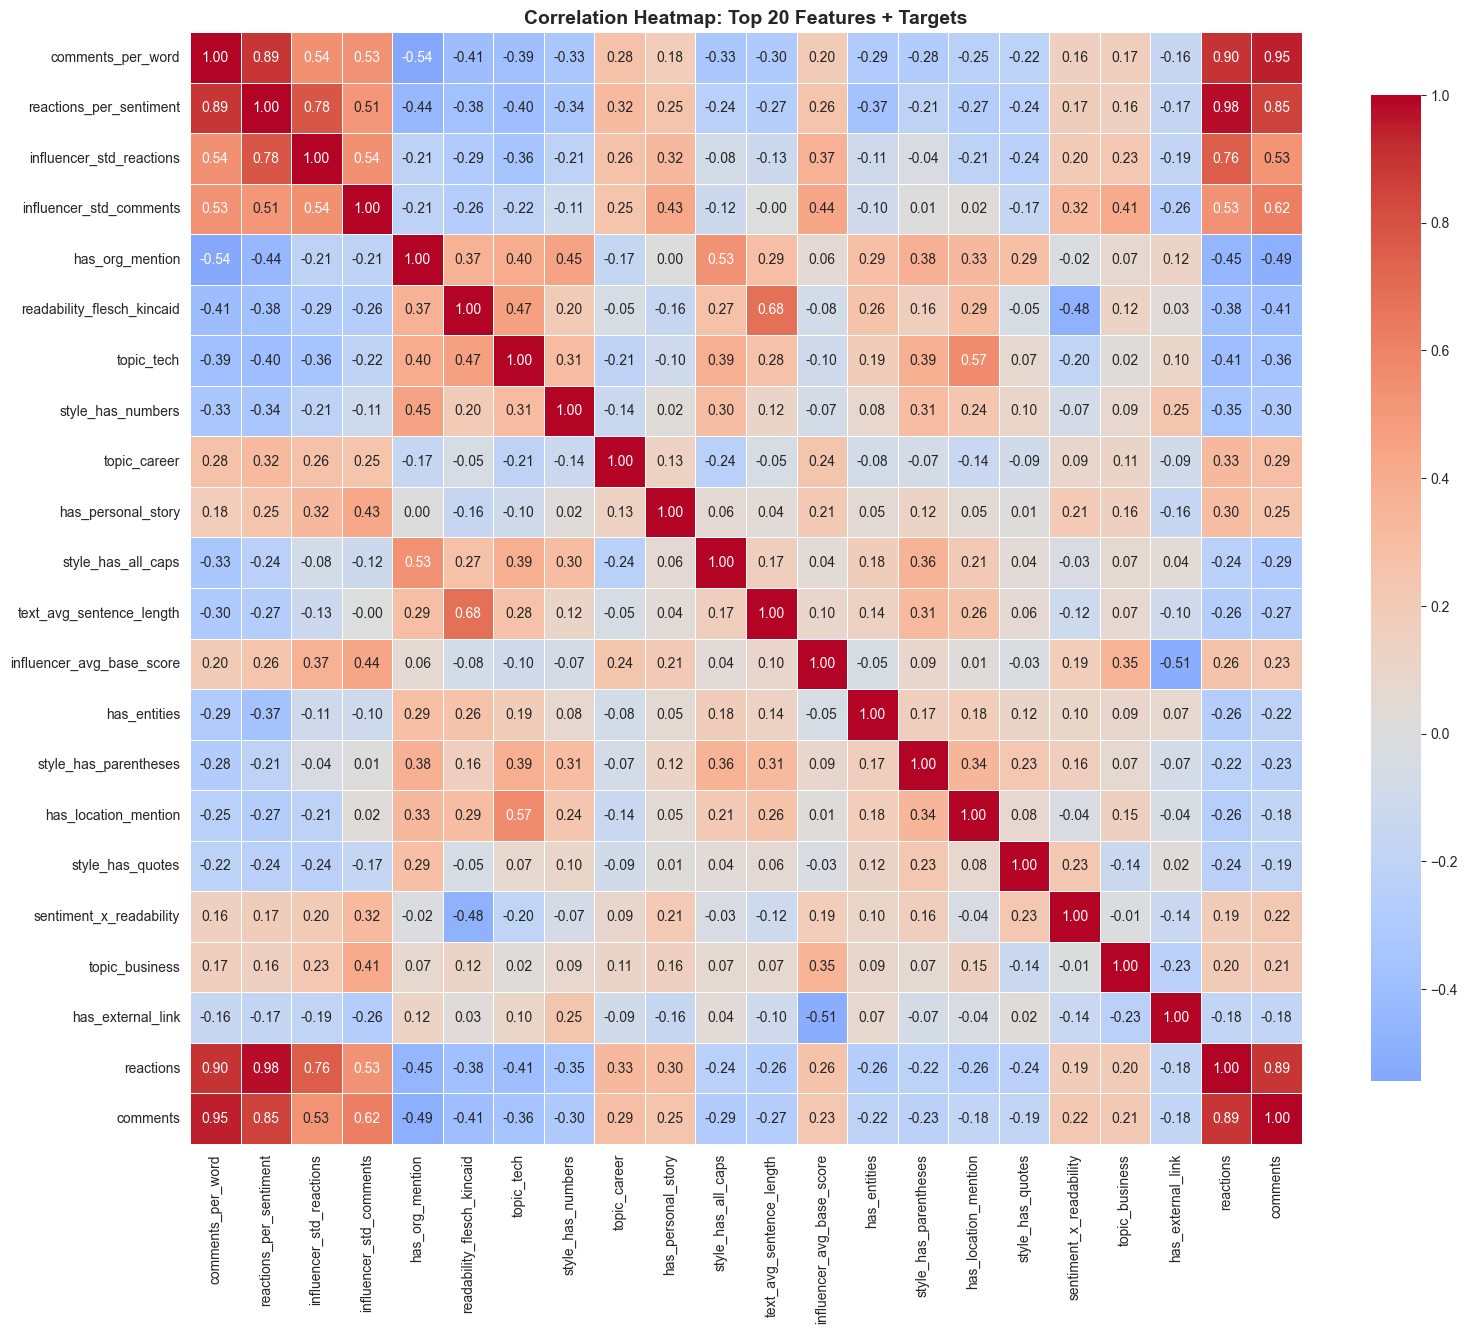

✓ Correlation heatmap complete


In [8]:
# Correlation heatmap for top 20 features
top20_features = correlations.nlargest(20, 'avg_abs_corr')['feature'].tolist()
top20_data = df[top20_features + target_cols]
corr_matrix = top20_data.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Top 20 Features + Targets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap complete")

## 6. Statistical Summary

In [9]:
# Comprehensive statistical summary
print("STATISTICAL SUMMARY OF TOP FEATURES")
print("="*80)

summary_stats = df[top_features].describe().T
summary_stats['skewness'] = df[top_features].skew()
summary_stats['kurtosis'] = df[top_features].kurtosis()

print(summary_stats.to_string())

print("\n" + "="*80)
print("✓ Statistical summary complete")

STATISTICAL SUMMARY OF TOP FEATURES
                            count        mean          std       min        25%        50%         75%           max  skewness   kurtosis
comments_per_word           139.0    0.105791     0.330647  0.000000   0.002344   0.010577    0.037665      2.036594  4.485565  20.527097
reactions_per_sentiment     139.0  510.482021  1554.880747  1.000000  22.129843  51.766139  158.566596  10411.572519  4.116486  17.763982
influencer_std_reactions    139.0  194.938850   478.218905  0.000000  11.269428  29.458445   98.177985   3301.891683  4.542403  25.024068
influencer_std_comments     139.0   19.185212    34.147219  0.000000   1.309275   2.267383    9.464847    121.712777  1.961183   2.602559
has_org_mention             139.0    0.848921     0.359421  0.000000   1.000000   1.000000    1.000000      1.000000 -1.969915   1.907809
readability_flesch_kincaid  139.0   10.521324     3.035692  2.365000   8.302268  10.685417   12.701574     17.169192 -0.169700  -0.36828

## 7. Key Insights Summary

In [10]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("="*80)

print("\n1. TARGET VARIABLES:")
print(f"   - Reactions: Mean={df['reactions'].mean():.1f}, Median={df['reactions'].median():.1f}")
print(f"   - Comments: Mean={df['comments'].mean():.1f}, Median={df['comments'].median():.1f}")
print(f"   - Both targets are right-skewed (more low-engagement posts)")

print("\n2. STRONGEST PREDICTORS (Reactions):")
for i, row in correlations.nlargest(5, 'abs_reactions').iterrows():
    print(f"   - {row['feature']}: r={row['reactions_corr']:.3f}")

print("\n3. STRONGEST PREDICTORS (Comments):")
for i, row in correlations.nlargest(5, 'abs_comments').iterrows():
    print(f"   - {row['feature']}: r={row['comments_corr']:.3f}")

print("\n4. FEATURE CHARACTERISTICS:")
print(f"   - Total features analyzed: {len(numeric_features)}")
print(f"   - Features with |r|>0.1 (reactions): {len(correlations[correlations['abs_reactions'] > 0.1])}")
print(f"   - Features with |r|>0.1 (comments): {len(correlations[correlations['abs_comments'] > 0.1])}")

print("\n5. MODELING RECOMMENDATIONS:")
print("   - Target transformation: Apply log transformation to reduce skewness")
print("   - Feature scaling: Standardize features before modeling")
print("   - Model selection: Tree-based models may handle non-linear relationships better")
print("   - Evaluation: Focus on MAPE/MAE due to outliers in targets")

print("\n" + "="*80)
print("SUCCESS: Exploratory analysis complete!")
print("="*80)
print("\nNext step: Model Training")


KEY INSIGHTS FROM EXPLORATORY ANALYSIS

1. TARGET VARIABLES:
   - Reactions: Mean=462.3, Median=47.0
   - Comments: Mean=38.6, Median=3.0
   - Both targets are right-skewed (more low-engagement posts)

2. STRONGEST PREDICTORS (Reactions):
   - reactions_per_sentiment: r=0.979
   - comments_per_word: r=0.901
   - influencer_std_reactions: r=0.764
   - influencer_std_comments: r=0.532
   - has_org_mention: r=-0.450

3. STRONGEST PREDICTORS (Comments):
   - comments_per_word: r=0.948
   - reactions_per_sentiment: r=0.854
   - influencer_std_comments: r=0.620
   - influencer_std_reactions: r=0.526
   - has_org_mention: r=-0.491

4. FEATURE CHARACTERISTICS:
   - Total features analyzed: 80
   - Features with |r|>0.1 (reactions): 48
   - Features with |r|>0.1 (comments): 45

5. MODELING RECOMMENDATIONS:
   - Target transformation: Apply log transformation to reduce skewness
   - Feature scaling: Standardize features before modeling
   - Model selection: Tree-based models may handle non-line